In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

<Axes: >

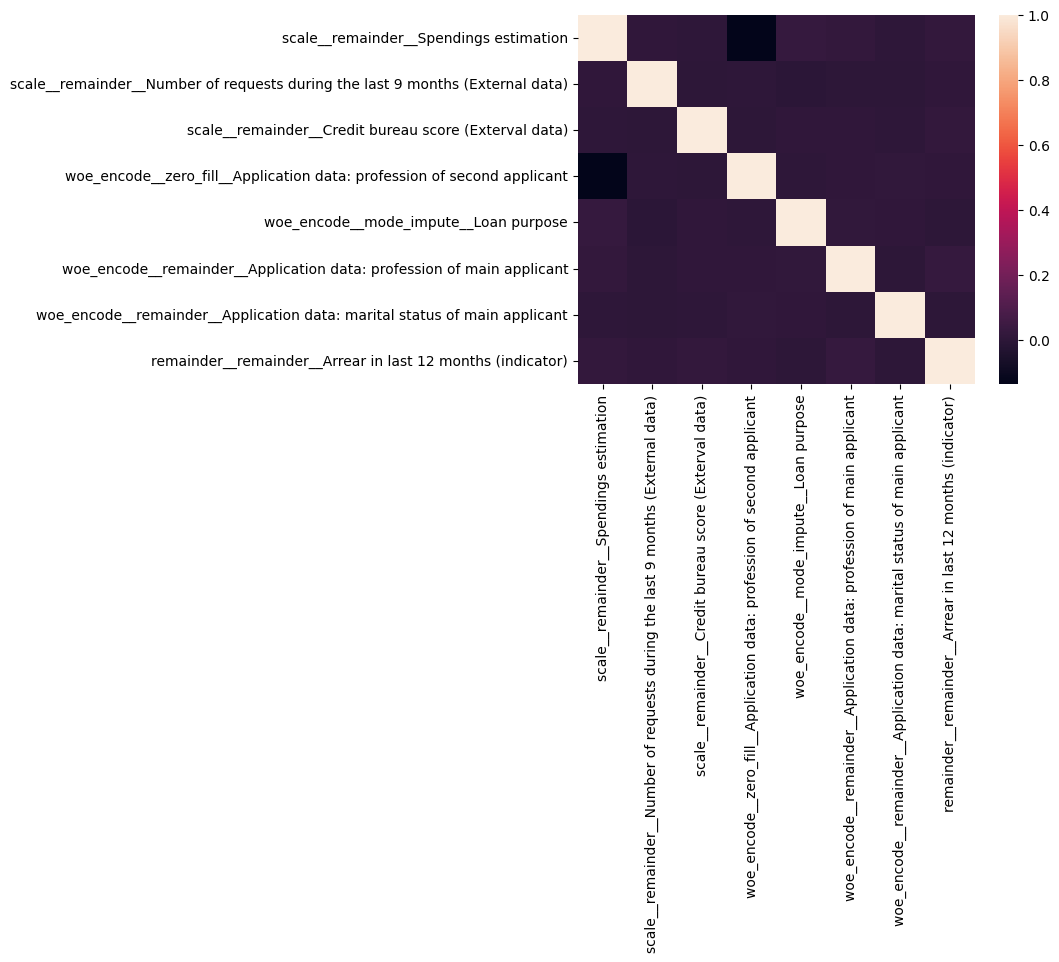

In [2]:
X_train = pd.read_pickle('C:\\Users\\ludwi\\ING-den\\Intermidiate_data\\x_train_logistic.pk')
Y_train = pd.read_pickle('C:\\Users\\ludwi\\ING-den\\Intermidiate_data\\y_train_logistic.pk')
X_test = pd.read_pickle('C:\\Users\\ludwi\\ING-den\\Intermidiate_data\\x_test_logistic.pk')
Y_test = pd.read_pickle('C:\\Users\\ludwi\\ING-den\\Intermidiate_data\\y_test_logistic.pk')
corr_matrix = X_train.corr(method = 'pearson')
sns.heatmap(corr_matrix)

In [20]:
logit = pd.read_pickle('C:\\Users\\ludwi\\ING-den\\Intermidiate_data\\model_logistic.pk')
coef = logit.coef_
param_names = logit.feature_names_in_
param_df = pd.DataFrame(data=coef, columns=param_names)
df_coef = param_df
param_df = param_df.T
names = {0:'Coefficients'}
df_coef = param_df.rename(names, axis=1)
df_coef.to_excel(excel_writer='C:\\Users\\ludwi\\OneDrive\\Pulpit\\Lions_den\\df_coef.xlsx')

In [5]:
X = np.ones(shape=(X_test.shape[0],X_test.shape[1]))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(36686, 8)
(36686,)
(3647, 8)
(3647,)


In [6]:
##################fituje nowy model pod testy
def Probability(X,Y):
    model = LogisticRegression()
    model.fit(X, Y)
    #print(model.intercept_)
    pi_matrix = model.predict_proba(X)
    return pi_matrix
def LL(pi_matrix):
    ln_sum = 0
    for i in range(0,len(pi_matrix)):
        ln_sum += np.log(max(pi_matrix[i]))
    return ln_sum
LL0 = LL(Probability(X,Y_test))
LLM = LL(Probability(X_test,Y_test))
Chi_LR = -2*(LL0 - LLM)
print(Probability(X,Y_test))
print(Probability(X_test,Y_test))
print(Chi_LR)

[[0.9667285 0.0332715]
 [0.9667285 0.0332715]
 [0.9667285 0.0332715]
 ...
 [0.9667285 0.0332715]
 [0.9667285 0.0332715]
 [0.9667285 0.0332715]]
[[0.88261173 0.11738827]
 [0.98065319 0.01934681]
 [0.97822958 0.02177042]
 ...
 [0.97710742 0.02289258]
 [0.97415223 0.02584777]
 [0.97409231 0.02590769]]
-5.607916132106567
